### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
# Adicionando identificação da loja com a coluna origem
loja['origem'] = 'loja1'
loja2['origem'] = 'loja2'
loja3['origem'] = 'loja3'
loja4['origem'] = 'loja4'

#concatenação das tabelas
pedidos = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [4]:
pedidos.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,origem
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


#1. Análise do faturamento


In [5]:
faturamento_loja = pedidos.groupby('origem')['Preço'].sum().reset_index()
faturamento_loja = faturamento_loja.rename(columns={'Preço': 'faturamento'})
faturamento_loja

,origem,faturamento
0,loja1,1534509.12
1,loja2,1488459.06
2,loja3,1464025.03
3,loja4,1384497.58


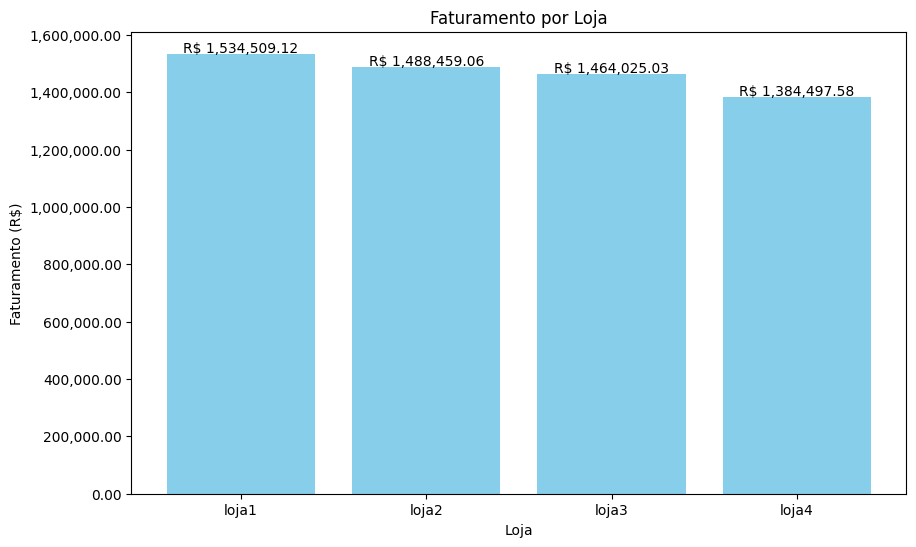

In [6]:
plt.figure(figsize=(10,6))
plt.bar(faturamento_loja['origem'], faturamento_loja['faturamento'],color='skyblue')

for i in range(len(faturamento_loja)):
    plt.text(faturamento_loja['origem'][i], faturamento_loja['faturamento'][i] + 5000,
             f'R$ {faturamento_loja["faturamento"][i]:,.2f}',
             ha='center', fontsize=10, color='black')

plt.title('Faturamento por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.2f}'))

plt.show()

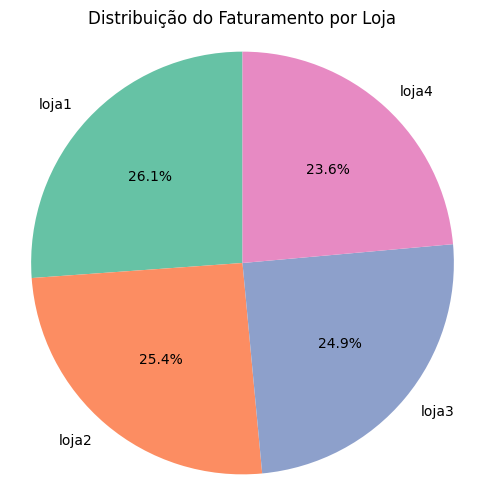

In [7]:
import seaborn as sns
cores = sns.color_palette('Set2')

plt.figure(figsize=(6,6))
plt.pie(
    faturamento_loja['faturamento'],
    labels=faturamento_loja['origem'],
    colors=cores,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribuição do Faturamento por Loja')
plt.axis('equal')
plt.show()

# 2. Vendas por Categoria


In [8]:
categoria_vendas = pedidos.groupby(['origem', 'Categoria do Produto'])['Produto'].count().reset_index(name='Quantidade de Vendas')

<ipython-input-9-5187394b5004>:10: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(


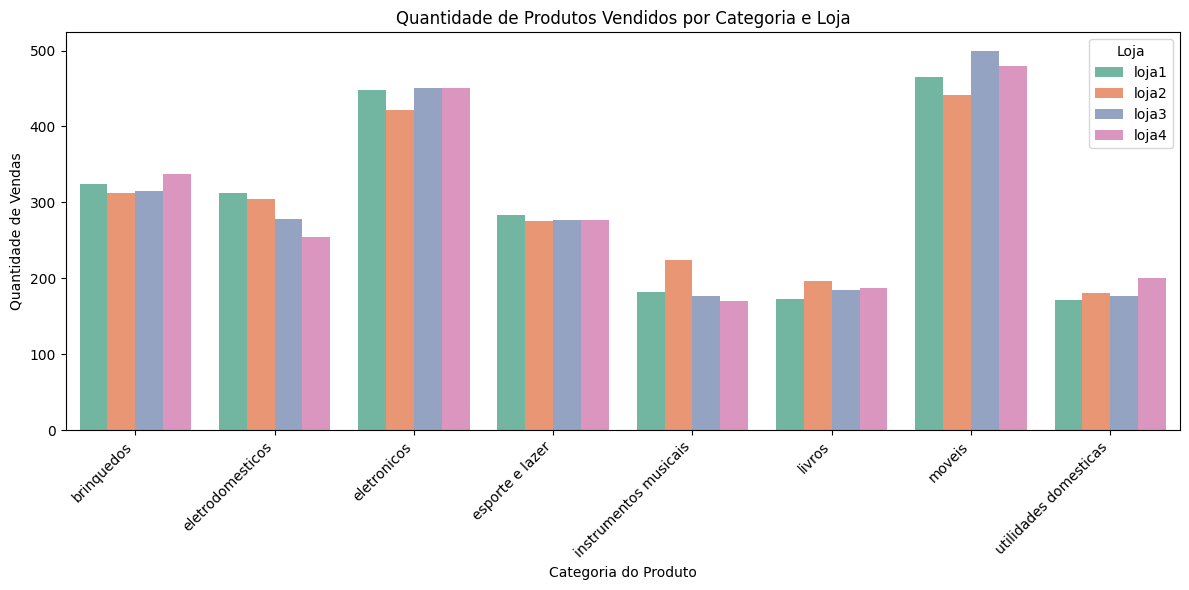

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

cores = sns.color_palette('Set2')

# Criar o gráfico
plt.figure(figsize=(12, 6))

sns.barplot(
    data=categoria_vendas,
    x='Categoria do Produto',
    y='Quantidade de Vendas',
    hue='origem',
    palette=cores
)

# Formatar o eixo Y para número inteiro
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Melhorias visuais
plt.title('Quantidade de Produtos Vendidos por Categoria e Loja')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.legend(title='Loja')
plt.tight_layout()

plt.show()


# 3. Média de Avaliação das Lojas

In [10]:
avaliacao_media = pedidos.groupby('origem')['Avaliação da compra'].mean().round(2).reset_index()
avaliacao_media

,origem,Avaliação da compra
0,loja1,3.98
1,loja2,4.04
2,loja3,4.05
3,loja4,4.00


# 4. Produtos Mais e Menos Vendidos

In [11]:
vendas_produtos = pedidos.groupby(['origem', 'Produto']).agg(
    Quantidade_de_Vendas=('Produto', 'count'),
    faturamento=('Preço', 'sum')
).reset_index()

# Cria base com a contagem das vendas dos produtos e o faturamento, agrupado por loja.

In [12]:
mais_vendidos = vendas_produtos.groupby('origem', group_keys=True).apply(
    lambda x: x.sort_values(by=['Quantidade_de_Vendas', 'faturamento'], ascending=[False, False]).head(1),
    include_groups=False
).reset_index()

mais_vendidos = mais_vendidos.drop(columns=["level_1"])
mais_vendidos["Tipo"] = "Mais vendidos"

mais_vendidos

# Ordena os produtos dentro de cada origem por quantidade de vendas e faturamento,
# garantindo que o mais vendido seja escolhido corretamente em caso de empate.
# Ou seja, se tivermos um ou mais produtos com a mesma quantidade de vendas, será escolhido o que tiver o maior faturamento

,origem,Produto,Quantidade_de_Vendas,faturamento,Tipo
0,loja1,TV Led UHD 4K,60,189534.28,Mais vendidos
1,loja2,Iniciando em programação,65,4169.96,Mais vendidos
2,loja3,Kit banquetas,57,22265.96,Mais vendidos
3,loja4,Cama box,62,43928.57,Mais vendidos


In [13]:
menos_vendidos = vendas_produtos.groupby('origem', group_keys=True).apply(
    lambda x: x.sort_values(by=['Quantidade_de_Vendas', 'faturamento'], ascending=[True, True]).head(1),
    include_groups=False
).reset_index()

menos_vendidos = menos_vendidos.drop(columns=["level_1"])
menos_vendidos["Tipo"] = "Menos vendidos"

menos_vendidos

# Se tivermos um ou mais produtos com a mesma quantidade de vendas, será escolhido o que tiver o menor faturamento

,origem,Produto,Quantidade_de_Vendas,faturamento,Tipo
0,loja1,Headset,33,6307.71,Menos vendidos
1,loja2,Jogo de tabuleiro,32,7749.58,Menos vendidos
2,loja3,Blocos de montar,35,1649.81,Menos vendidos
3,loja4,Guitarra,33,34430.67,Menos vendidos


In [14]:
vendas_destaque = pd.concat([mais_vendidos, menos_vendidos])

# Concatena a base dos produtos mais e menos vendidos.

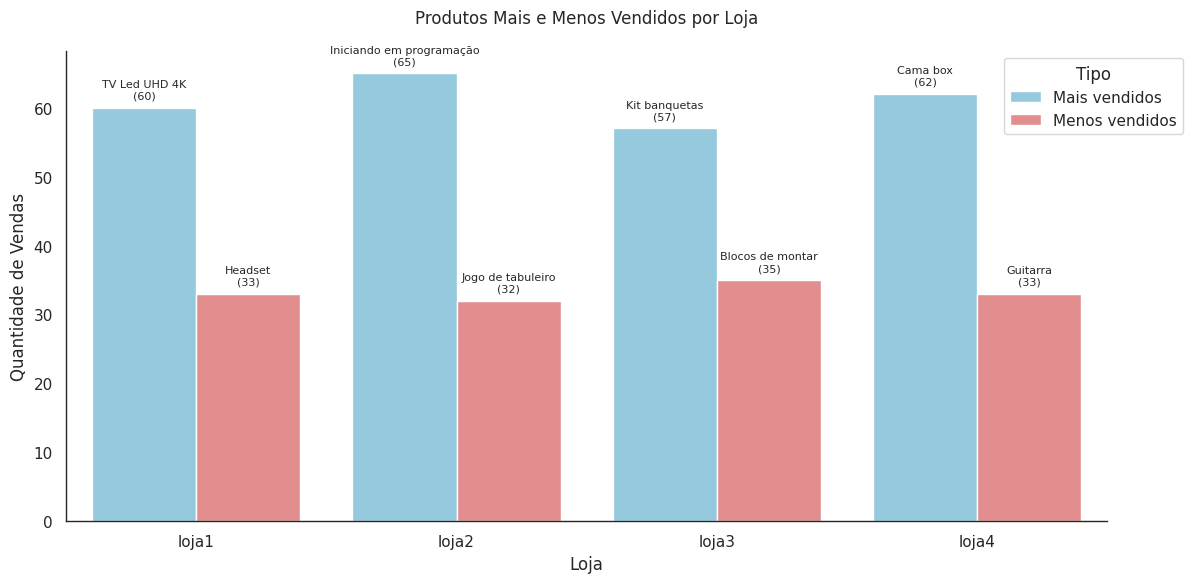

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cores para o gráfico
cores = {
    'Mais vendidos': 'skyblue',
    'Menos vendidos': 'lightcoral'
}

sns.set(style="white")

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=vendas_destaque,
    x='origem',
    y='Quantidade_de_Vendas',
    hue='Tipo',
    palette=cores,
    dodge=True
)

# Adicionar o nome do produto e a quantidade acima das barras
for bar, (_, row) in zip(ax.patches, vendas_destaque.iterrows()):
    altura = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    produto = row['Produto']
    quantidade = int(altura)
    ax.text(
        x,
        altura + 1,
        f"{produto}\n({quantidade})",
        ha='center',
        va='bottom',
        fontsize=8
    )

ax.legend(title="Tipo", loc="upper right", bbox_to_anchor=(1.08, 1))

ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)

ax.set_title("Produtos Mais e Menos Vendidos por Loja", pad=20)
ax.set_xlabel("Loja")
ax.set_ylabel("Quantidade de Vendas")
sns.despine()
plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [16]:
frete_medio = pedidos.groupby('origem')['Frete'].mean().round(2).reset_index()
frete_medio

,origem,Frete
0,loja1,34.69
1,loja2,33.62
2,loja3,33.07
3,loja4,31.28


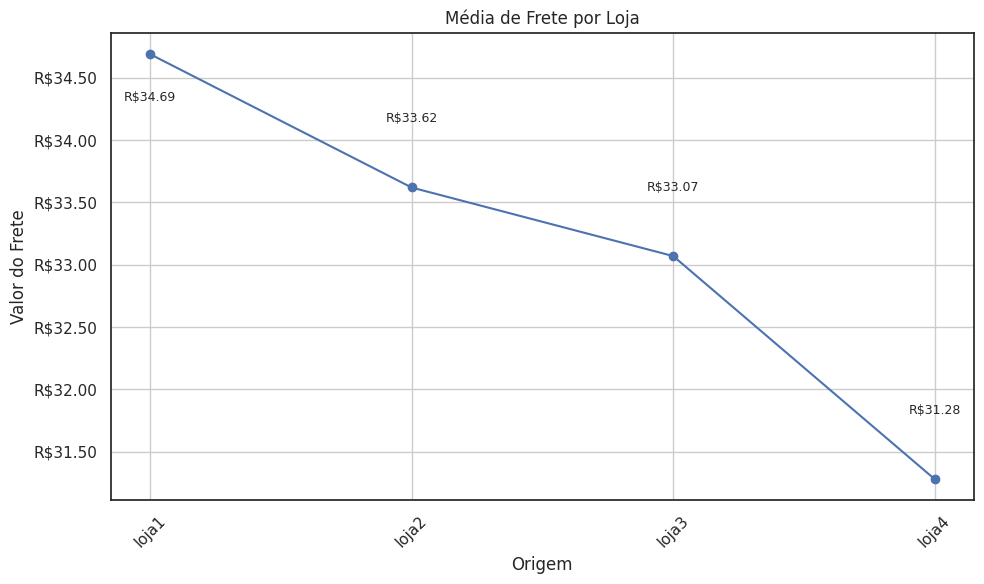

In [17]:
import matplotlib.pyplot as plt

lojas = frete_medio['origem']
medias = frete_medio['Frete']

plt.figure(figsize=(10, 6))
plt.plot(lojas, medias, marker='o')

for i, valor in enumerate(frete_medio['Frete']):
    deslocamento = -0.3 if i == 0 else 0.5
    alinhamento = 'top' if i == 0 else 'bottom'
    plt.text(frete_medio['origem'][i], valor + deslocamento, f'R${valor}',
             ha='center', va=alinhamento, fontsize=9)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x:.2f}'))
plt.ylabel('Valor do Frete')
plt.xlabel('Origem')
plt.title('Média de Frete por Loja')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Relatório

Após análise dos dados das quatro lojas, conclui-se que a loja 4 é a que mais faz sentindo ser vendida. Ela tem o menor faturamento total (R\$ 1.384.497,58), o que indica de forma geral, que seu retorno financeiro é o mais baixo.  

Embora a loja 4 tenha um bom desempenho nas vendas de algumas categorias como: brinquedos, eletrônicos, móveis e utilidades domésticas, isso não se reflete no faturamento. Da mesma forma acontece com os produtos mais vendidos, a cama box foi o produto com o maior destaque na loja, com um faturamento de R\$ 43.928,57, inclusive, maior do que o produto mais vendido da loja 2 (R\$ 4.169,96) e da loja 3 (R\$ 22.265,96). Ainda assim, esse bom resultado pontual não foi suficiente para equilibrar o desempenho mais fraco dos demais produtos.

Isso fica ainda mais evidente quando analisamos o produto menos vendido da loja 4. Uma guitarra que teve um faturamento relativamente alto (R\$ 34.430,67) mesmo com baixa saída. Esse valor é bem superior ao dos produtos menos vendidos das outras lojas: headset na loja 1 (R\$ 6.307,71), jogo de tabuleiro na loja 2 (R\$ 7.749,58) e blocos de montar na loja 3 (R\$ 1.649,81). Isso revela o quanto a loja 4 investe em itens caros e de baixa rotatividade, o que pode gerar estoque parado, consequentemente impactando negativamente no fluxo do caixa.

Em relação ao frete, a loja4 possui o menor custo médio (R\$ 31,28), o que até poderia representar uma vantagem competitiva. No entanto, a diferença é pequena em relação às demais lojas e acaba não compensando o desempenho financeiro inferior. Além disso, a avaliação dos clientes da loja4 tem uma nota mediana (4.00), sendo superior apenas à loja1 (3.98), mas perde para loja2 (4.04) e loja3 (4.05).

Em resumo, a loja4 apresenta baixa performance em faturamento, produtos caros e de pouca saída, avaliação mediana e um frete que não gera vantagem. Assim, faz mais vende-la e concentrar esforços nas outras lojas que estão dando mais resultado. Além disso, essa venda representa a melhor oportunidade para que o Sr. João possa direcionar recursos para um novo negócio com maior potencial de crescimento.



